<a href="https://colab.research.google.com/github/rsonar821/Unsupervised-Learning-Capstone-Project/blob/main/Book_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Books Dataframe**

In [3]:
books_df = pd.read_csv('/content/drive/MyDrive/Books.csv')

In [4]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books_df.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [6]:
books_df.shape

(271360, 8)

In [7]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [8]:
books_df.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [9]:
books_df.duplicated().sum()

0

In [10]:
books_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

In [11]:
books_df.rename(columns = {'Book-Title':'Title', 'Book-Author':'Author',
                           'Year-Of-Publication':'Publication Year'}, inplace=True)

In [12]:
books_df.nunique()

ISBN                271360
Title               242135
Author              102023
Publication Year       202
Publisher            16807
dtype: int64

In [13]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ISBN              271360 non-null  object
 1   Title             271360 non-null  object
 2   Author            271359 non-null  object
 3   Publication Year  271360 non-null  object
 4   Publisher         271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [14]:
books_df.describe(include = 'all')

,ISBN,Title,Author,Publication Year,Publisher
count,271360,271360,271359,271360,271358
unique,271360,242135,102023,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [15]:
books_df.isnull().sum()

ISBN                0
Title               0
Author              1
Publication Year    0
Publisher           2
dtype: int64

In [16]:
books_df['Author'].fillna('Agatha Christie', inplace=True)
books_df['Publisher'].fillna('Harlequin', inplace=True)

In [17]:
books_df.isnull().sum()

ISBN                0
Title               0
Author              0
Publication Year    0
Publisher           0
dtype: int64

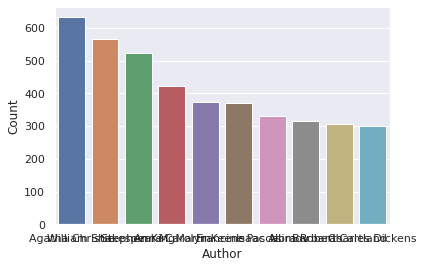

In [18]:
top_authors = pd.DataFrame(books_df['Author'].value_counts()[:10]).reset_index()
top_authors.rename(columns = {'index':'Author', 'Author':'Count'}, inplace = True)
sns.barplot(x = 'Author', y = 'Count', data = top_authors)

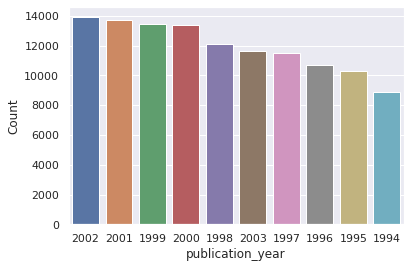

In [19]:
top_years = pd.DataFrame(books_df['Publication Year'].value_counts()[:10]).reset_index()
top_years.rename(columns = {'index':'publication_year', 'Publication Year':'Count'}, inplace=True)
sns.barplot(x='publication_year', y='Count', data=top_years, order=top_years.sort_values('Count', ascending=False).publication_year)

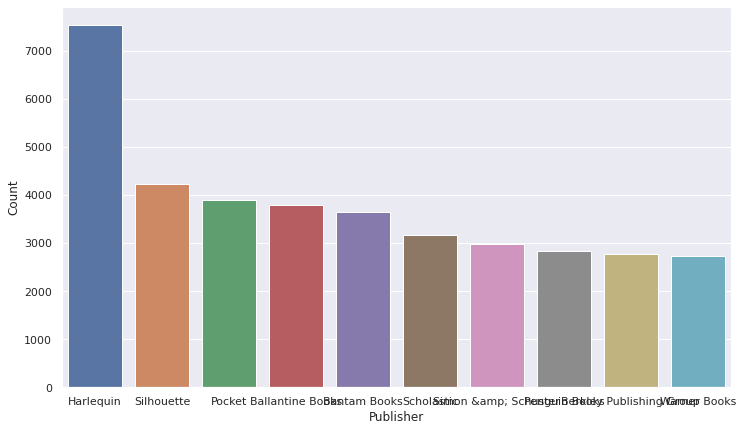

In [20]:
top_publishers = pd.DataFrame(books_df['Publisher'].value_counts()[:10]).reset_index()
top_publishers.rename(columns = {'index':'Publisher', 'Publisher':'Count'}, inplace=True)
plt.figure(figsize=(12,7))
sns.barplot(x='Publisher', y='Count', data=top_publishers)

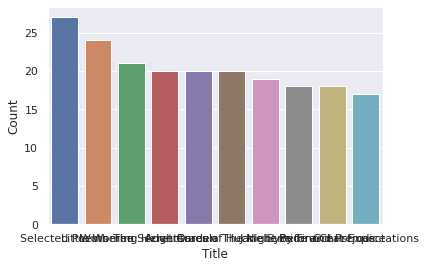

In [21]:
top_titles = pd.DataFrame(books_df['Title'].value_counts()[:10]).reset_index()
top_titles.rename(columns = {'index':'Title', 'Title':'Count'}, inplace = True)
sns.barplot(x = 'Title', y = 'Count', data = top_titles)

## **Users Dataframe**

In [22]:
users_df = pd.read_csv('/content/drive/MyDrive/Users.csv')

In [23]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [24]:
users_df.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [25]:
users_df.shape

(278858, 3)

In [26]:
users_df.rename(columns = {'User-ID':'User_ID'}, inplace = True)

In [27]:
users_df.head()

,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [28]:
users_df.isnull().sum()

User_ID          0
Location         0
Age         110762
dtype: int64

In [29]:
users_df['Age'].fillna(users_df['Age'].mean(), inplace=True)

In [30]:
users_df.isnull().sum()

User_ID     0
Location    0
Age         0
dtype: int64

In [31]:
users_df.dtypes

User_ID       int64
Location     object
Age         float64
dtype: object

In [32]:
users_df.duplicated().sum()

0

In [33]:
users_df.nunique()

User_ID     278858
Location     57339
Age            166
dtype: int64

In [34]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User_ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [35]:
users_df.describe(include = 'all')

,User_ID,Location,Age
count,278858.00000,278858,278858.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,11.202003
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,29.000000
50%,139429.50000,NaN,34.751434
75%,209143.75000,NaN,35.000000


In [36]:
def part_string(string):
  country = string.rpartition(' ')[-1]
  if country=='zealand':
    return 'new zealand'
  else:
    return country

In [37]:
users_df['Country'] = users_df['Location'].apply(part_string)

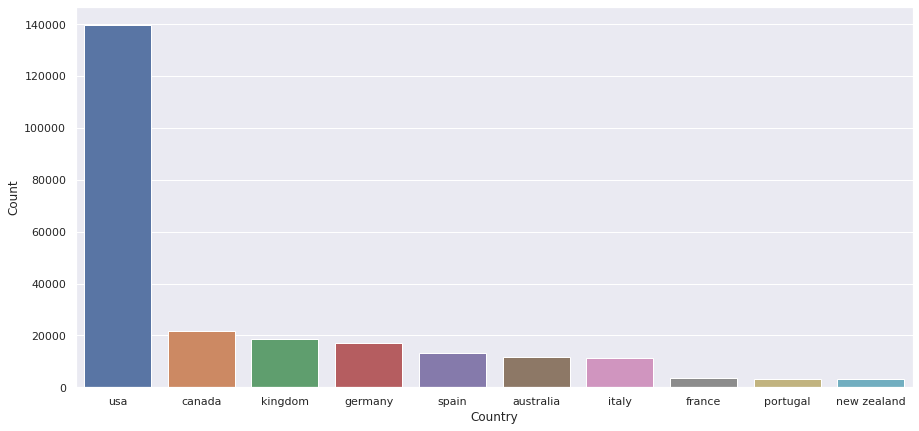

In [38]:
top_countries = pd.DataFrame(users_df['Country'].value_counts()[:10]).reset_index()
top_countries.rename(columns = {'index':'Country', 'Country':'Count'}, inplace=True)
plt.figure(figsize=(15,7))
sns.barplot(x='Country', y='Count', data=top_countries)

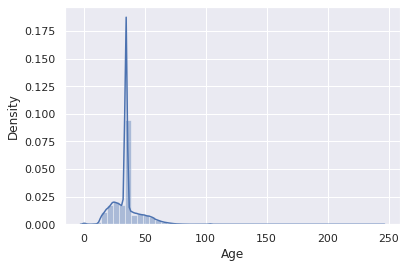

In [39]:
sns.distplot(users_df['Age'])

## **Rating Dataframe**

In [40]:
ratings_df = pd.read_csv('/content/drive/MyDrive/Ratings.csv')

In [41]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [42]:
ratings_df.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [43]:
ratings_df.shape

(1149780, 3)

In [44]:
ratings_df.rename(columns = {'User-ID':'user_id', 'Book-Rating':'Rating'}, inplace = True)

In [45]:
ratings_df.head()

,user_id,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [46]:
ratings_df.isnull().sum()

user_id    0
ISBN       0
Rating     0
dtype: int64

In [47]:
ratings_df.dtypes

user_id     int64
ISBN       object
Rating      int64
dtype: object

In [48]:
ratings_df.duplicated().sum()

0

In [49]:
ratings_df.nunique()

user_id    105283
ISBN       340556
Rating         11
dtype: int64

In [50]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1149780 non-null  int64 
 1   ISBN     1149780 non-null  object
 2   Rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [51]:
ratings_df.describe(include = 'all')

,user_id,ISBN,Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


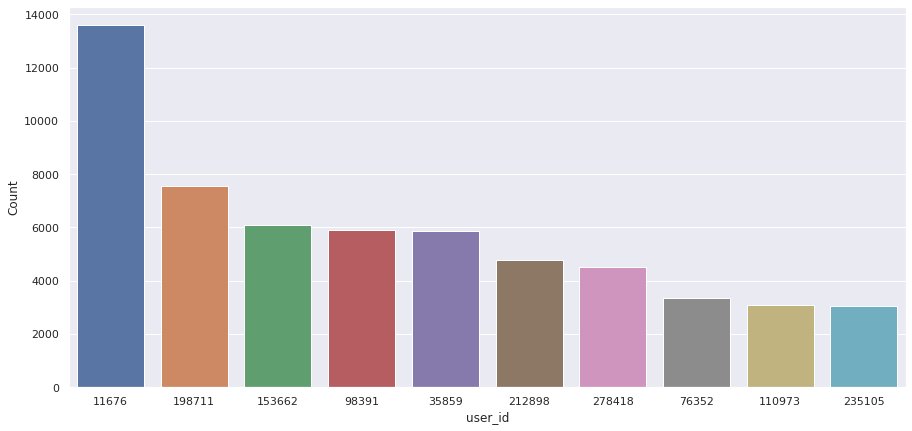

In [52]:
top_users = pd.DataFrame(ratings_df['user_id'].value_counts()[:10]).reset_index()
top_users.rename(columns = {'index':'user_id', 'user_id':'Count'}, inplace=True)
plt.figure(figsize=(15,7))
sns.barplot(x='user_id', y='Count', data=top_users, order=top_users.sort_values('Count', ascending=False).user_id)

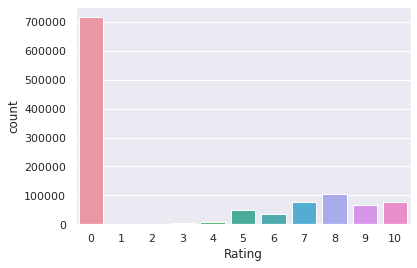

In [53]:
sns.countplot(x=ratings_df['Rating'])

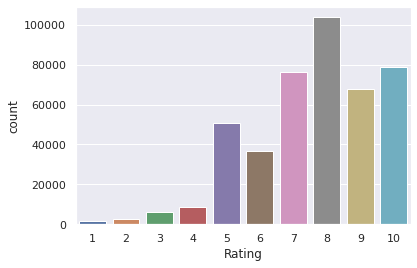

In [54]:
rating = ratings_df[ratings_df['Rating']!=0]
sns.countplot(x = rating['Rating'], data=rating)